In [1]:
import json
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from utils.amt_inout import bounded_curve, bounded_sigmoid
from utils.stock_loader import Loader

In [2]:
SYM = 'EEM'  # emerging markets
START = '1965-01-01'
PARAM_PATH = '../data/inout_params_eem.pkl'
loader = Loader([SYM], START)
df = loader.download()
df.set_index('Date', drop=True, inplace=True)
df.columns = [
    'open', 'high', 'low', 'close', 'value', 'logval',
    'intraday_change', 'day_to_day_change', 'overnight_change']
df.logval.fillna(method='ffill')
for adj in ['overnight_change', 'day_to_day_change']:
    df[adj] = pd.Series(
        np.concatenate([df[adj].values[1:], [np.nan]]), index=df.index)
print(df.shape)
df.head(10)

[*********************100%***********************]  1 of 1 completed


Generating derived columns...
(5451, 9)


,open,high,low,close,value,logval,intraday_change,day_to_day_change,overnight_change
Date,,,,,,,,,
2003-04-14 00:00:00+00:00,7.536494,11.222222,11.222222,11.144444,11.144444,2.019757,1.006979,1.011881,1.006139
2003-04-15 00:00:00+00:00,7.626038,11.355556,11.388889,11.291111,11.291111,2.031568,1.005708,1.011546,1.010763
2003-04-16 00:00:00+00:00,7.714088,11.486667,11.533333,11.477778,11.477778,2.043048,1.000774,1.007158,1.005514
2003-04-17 00:00:00+00:00,7.769305,11.568889,11.572222,11.530000,11.550000,2.050181,1.001635,0.999616,1.001153
2003-04-21 00:00:00+00:00,7.766319,11.564444,11.583333,11.555556,11.582222,2.049796,0.998465,1.003363,0.999904
2003-04-22 00:00:00+00:00,7.792438,11.603333,11.603333,11.527778,11.563333,2.053154,1.003459,1.004692,1.000670
2003-04-23 00:00:00+00:00,7.829000,11.657778,11.657778,11.572222,11.611111,2.057835,1.004019,0.980270,0.992185
2003-04-24 00:00:00+00:00,7.674538,11.427778,11.566667,11.400000,11.566667,2.037908,0.987992,0.983471,0.985999
2003-04-25 00:00:00+00:00,7.547688,11.238889,11.267778,11.222222,11.267778,2.021241,0.997436,1.016510,1.002571


In [3]:
df.isnull().sum()

open                 0
high                 0
low                  0
close                0
value                0
logval               0
intraday_change      0
day_to_day_change    1
overnight_change     1
dtype: int64

In [4]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

open                 0
high                 0
low                  0
close                0
value                0
logval               0
intraday_change      0
day_to_day_change    0
overnight_change     0
dtype: int64

In [5]:
df.high[(df.high != df.low)]

Date
2003-04-15 00:00:00+00:00    11.355556
2003-04-16 00:00:00+00:00    11.486667
2003-04-17 00:00:00+00:00    11.568889
2003-04-21 00:00:00+00:00    11.564444
2003-04-24 00:00:00+00:00    11.427778
                               ...    
2024-12-02 00:00:00+00:00    43.430000
2024-12-03 00:00:00+00:00    43.520000
2024-12-04 00:00:00+00:00    43.630001
2024-12-05 00:00:00+00:00    43.919998
2024-12-06 00:00:00+00:00    43.849998
Name: high, Length: 5252, dtype: float64

In [6]:
SIM_START = pd.to_datetime('2003-04-15', utc=True)  # first day of legit open/close values
SIM_START

Timestamp('2003-04-15 00:00:00+0000', tz='UTC')

In [7]:
len(df.index >= SIM_START)

5451

In [8]:
df[df.index >= SIM_START]

,open,high,low,close,value,logval,intraday_change,day_to_day_change,overnight_change
Date,,,,,,,,,
2003-04-15 00:00:00+00:00,7.626038,11.355556,11.388889,11.291111,11.291111,2.031568,1.005708,1.011546,1.010763
2003-04-16 00:00:00+00:00,7.714088,11.486667,11.533333,11.477778,11.477778,2.043048,1.000774,1.007158,1.005514
2003-04-17 00:00:00+00:00,7.769305,11.568889,11.572222,11.530000,11.550000,2.050181,1.001635,0.999616,1.001153
2003-04-21 00:00:00+00:00,7.766319,11.564444,11.583333,11.555556,11.582222,2.049796,0.998465,1.003363,0.999904
2003-04-22 00:00:00+00:00,7.792438,11.603333,11.603333,11.527778,11.563333,2.053154,1.003459,1.004692,1.000670
...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00+00:00,43.430000,43.430000,43.490002,43.209999,43.360001,3.771150,1.001614,1.002072,0.996086
2024-12-03 00:00:00+00:00,43.520000,43.520000,43.549999,43.099998,43.259998,3.773221,1.006010,1.002528,1.003217
2024-12-04 00:00:00+00:00,43.630001,43.630001,43.700001,43.490002,43.660000,3.775745,0.999313,1.006647,1.005042


In [9]:
def get_random_params():
    k = np.random.uniform(1, 10)
    if np.random.choice([True, False]):
        k = 1/k
    return {
        'time_param': np.random.randint(5, 250),
        'method':     np.random.choice(['ew', 'ma', 'linear']), #'linear_ma']),
        't':          np.random.uniform(0, 1),
        'k':          k,
        'as_q':       np.random.choice([True, False]),
        'transform_f': np.random.choice(['bounded_curve', 'bounded_sigmoid'])}

In [10]:
def tweak_best_params(params, factor=2, numeric_only=False):
    '''A small factor should have values very close to current, larger
    values allow wilder fluctuations'''
    time = params['time_param']
    upper = time * factor
    diff = upper - time
    time = np.random.randint(time - diff, upper)
    time = min(max(5, time), 1000)
    
    method = params['method']
    if not numeric_only:
        meths = ['ew', 'ma', 'linear_ma', 'linear']
        idx = meths.index(method)
        ps = np.array([1, 1, 1, 1])
        ps[idx] = factor
        ps = ps / ps.sum()
        method = np.random.choice(meths, p=ps)
    
    t = params['t']
    sd = 1 - 1 / (factor/2 + 1)
    t = min(max(np.random.normal(t, scale=sd), 0.001), 0.999)
    
    k = params['k']
    upper = k * factor
    diff = upper - k
    k = np.random.uniform(k - diff, upper)
    k = min(max(1/10, k), 10)
    
    as_q = params['as_q'] if numeric_only else np.random.choice([True, False]) 
    
    current_transform = params['transform_f']
    other_transform = 'bounded_curve' if current_transform == 'bounded_sigmoid' else 'bounded_sigmoid'
    p_current = 1 / factor
    transform_f = np.random.choice([current_transform, other_transform], p=[p_current, 1 - p_current])
    return {
        'time_param': time,
        'method': method,
        't': t,
        'k': k,
        'as_q': as_q,
        'transform_f': transform_f}

In [11]:
def get_ma(series: pd.Series, time_param: float | int, method: str):
    '''Calculate the moving average
    Args:
    - method: 'ew' | 'ma' | 'linear' | 'linear_ma'
    - time_param:
      - ew=True: (real) the halflife of the exponential weights (no. 
          of  time periods it takes for weight to drop from 1 to 0.5)
      - ew=False: (int) the ma window, or number of days to average 
   over
    '''
    if method == 'ew':
        trend = series.ewm(halflife=time_param, ignore_na=True).mean()
    elif method == 'ma':
        trend = series.rolling(window=int(time_param)).mean()
    elif method.startswith('linear'):
        trend = (series).rolling(window=int(time_param)).apply(lambda x: (x[-1] + x[0]) / 2)
        if method == 'linear_ma':
            trend = trend.rolling(window=int(time_param)).mean()
        trend.fillna(method='bfill', inplace=True)
    return trend

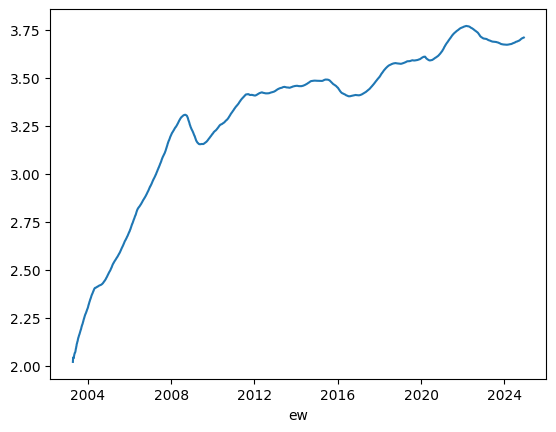

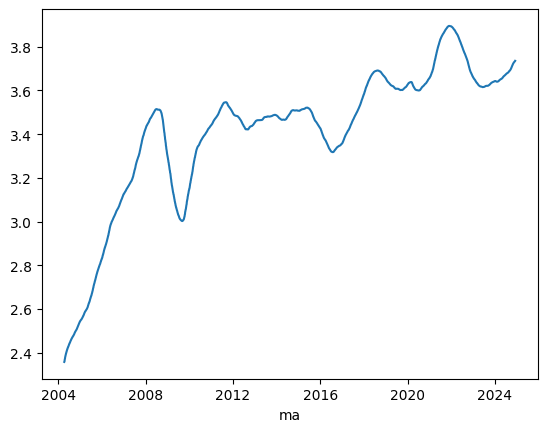

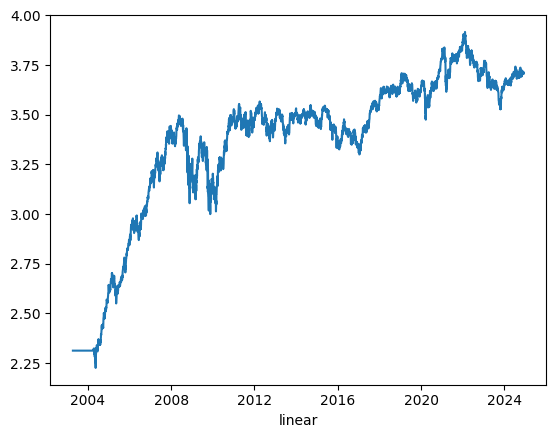

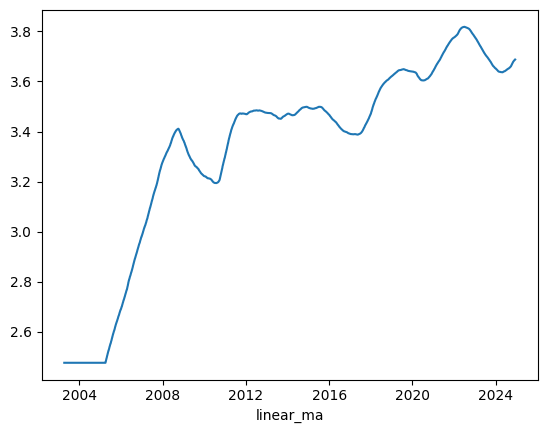

In [12]:
for method in ['ew', 'ma', 'linear', 'linear_ma']:
    plt.plot(get_ma(df.logval, 250, method))
    plt.xlabel(method)
    plt.show()

In [13]:
def get_trend_multiple(series, time_param, method, as_q):
    'Get deviates (as quantiles) relative to trend'
    trend = get_ma(series, time_param, method)
    factor = series / trend
    if as_q:
        factor = factor.rank() / len(factor)
    return factor

In [14]:
def rescale_minmax(series, mn=0, mx=1):
    s = series.copy()
    out_rng = mx - mn
    obs_min = s.min()
    s -= obs_min
    obs_max = s.max()
    s /= obs_max
    s *= out_rng
    s += mn
    return s

In [15]:
def calculate_next_row(row):
    invested = row.invested * row.overnight_change
    total = invested + row.reserve
    target_in = total * row.amt_in
    diff = target_in - invested  # if diff+ buy; - sell
    invested += diff
    reserve = row.reserve - diff
    invested *= row.day_to_day_change
    return invested, reserve, invested + reserve

In [16]:
def simulate(df, params):
    df['trend_factor'] = rescale_minmax(
        get_trend_multiple(
            df.logval,
            params['time_param'],
            method=params['method'],
            as_q=params['as_q']))
    ###
    df = df[df.trend_factor.notnull()]
    ###
    if params['transform_f'] == 'bounded_curve':
        df['amt_in'] = bounded_curve(
            df.trend_factor, params['t'], params['k'], 'down')
    elif params['transform_f'] == 'bounded_sigmoid':
        df['amt_in'] = bounded_sigmoid(
            df.trend_factor, params['t'], params['k'], 'down')
    df = df.loc[df.index >= SIM_START, :].copy()
    df['invested'] = np.nan
    df['reserve'] = np.nan
    df['total'] = np.nan
    df['invested'][0] = df.amt_in[0]
    df['reserve'][0] = 1 - df.amt_in[0]
    df['total'][0] = 1
    for i in range(len(df) - 1) :
        row = df.iloc[i, :]
        try:
            nxt_idx = df.index[i + 1]
            df.loc[nxt_idx, ['invested', 'reserve', 'total']] = (
                calculate_next_row(row))
        except IndexError:
            break
    return df

In [17]:
def run_simulation(
        df, iters=100, current_best=None, best_params=None, 
        param_select='random', factor=2, numeric_only=False):
    orig_df = df.copy()
    do_nothing_res = orig_df.value[-1] / orig_df.loc[SIM_START, 'value']
    print('Do nothing res:', do_nothing_res)
    if current_best is None:
        current_best = 0
    for i in range(iters):
        print('Round', i + 1, end=': ')
        if i == 0 and best_params is not None and param_select == 'random':
            params = best_params  # rerun again on new data
            current_best = 0 
        elif param_select == 'random':
            params = get_random_params()
        else:
            params = (
                tweak_best_params(best_params, factor, numeric_only=numeric_only)
                if best_params is not None else get_random_params())
        df = simulate(orig_df.copy(), params)
        final = df.total[-1]
        print(final)
        if np.isnan(final):
            continue
            #return df, params
        if final > current_best:
            current_best = final
            best_params = params
            print('New best:', current_best)
            print(params)
            plt.plot(df.total, label='best')
            plt.plot(df.value / df.value[0], label='S&P')
            plt.yscale('log')
            plt.legend()
            plt.show()
    return current_best, best_params

In [18]:
try:
    with open(PARAM_PATH, 'rb') as f:
        current_best, best_params = pickle.load(f)
except FileNotFoundError:
    current_best, best_params = None, None
    
current_best, best_params #= None, None

(60.55382355923442,
 {'time_param': 6,
  'method': 'linear',
  't': 0.6492746871671347,
  'k': 5.796955293378633,
  'as_q': False,
  'transform_f': 'bounded_sigmoid'})

Do nothing res: 3.8995275849125832
Round 1: 60.553788853509076
New best: 60.553788853509076
{'time_param': 6, 'method': 'linear', 't': 0.6492746871671347, 'k': 5.796955293378633, 'as_q': False, 'transform_f': 'bounded_sigmoid'}


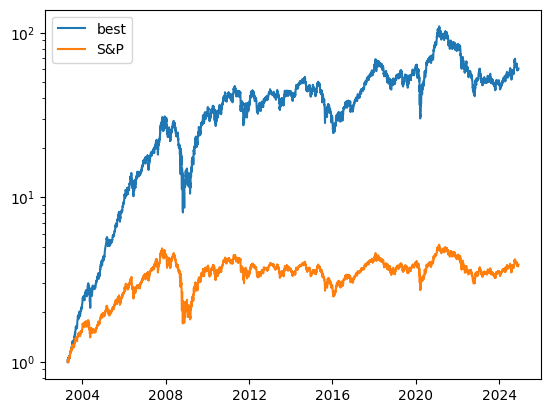

Round 2: 1.1404835646505618
Round 3: 3.8008512990706524
Round 4: 34.26013850136196
Round 5: 6.7572546830827935
Round 6: 1.5608481297192296
Round 7: 1.3958011492137636
Round 8: 4.401743237716622
Round 9: 3.9052958085155174
Round 10: 35.42708352259364
Round 11: 1.5718001096341876
Round 12: 18.32395316358854
Round 13: 1.3389557610731686
Round 14: 4.009937282823172
Round 15: 4.026944833009848
Round 16: 1.758039362307424
Round 17: 29.520071428435962
Round 18: 6.617192283600382
Round 19: 3.550371187773462
Round 20: 0.7867852429453261
Round 21: 4.708897226662618
Round 22: 12.665047683281571
Round 23: 6.782548404924459
Round 24: 34.26392179539273
Round 25: 16.680642531229942
Round 26: 26.635700718803246
Round 27: 1.000404651356826
Round 28: 37.158724775047475
Round 29: 1.491951239110323
Round 30: 2.7714227778705025
Round 31: 1.4810955735171125
Round 32: 1.7545731394082504
Round 33: 29.267421055801385
Round 34: 8.226902502120474
Round 35: 27.289872692826613
Round 36: 2.8930120516202003
Round 37

In [19]:
best_out, params_out = run_simulation(
    df.copy(), current_best=current_best, best_params=best_params)

In [20]:
# initially [1/4, 1/2, 1, 2]
for w in [16, 32, 64, 128]:  # bigger w -> smaller factor -> smaller changes
    factor = 1 + (1/w)
    print('Factor:', factor)
    best_out, params_out = run_simulation(
        df.copy(), 
        iters=25, 
        current_best=best_out, 
        best_params=params_out, 
        param_select='tweak',
        factor=factor,  # closer to 1: small changes; bigger: bigger
        numeric_only=True) 
    print()

Factor: 1.0625
Do nothing res: 3.8995275849125832
Round 1: 29.653808427168553
Round 2: 51.92309168153098
Round 3: 45.094919884269785
Round 4: 38.659773967864666
Round 5: 36.68281239449419
Round 6: 7.007586899753498
Round 7: 1.7950085566979224
Round 8: 35.14794631226628
Round 9: 7.0662177749539605
Round 10: 34.389728164825776
Round 11: 5.426665175896825
Round 12: 41.776249110592175
Round 13: 36.250583362403525
Round 14: 40.591134859835975
Round 15: 9.069297658370388
Round 16: 1.7788256020064817
Round 17: 1.2440228926959174
Round 18: 3.6466466141646805
Round 19: 38.033832073056765
Round 20: 36.86412641226605
Round 21: 1.4166587077693191
Round 22: 1.0908980082645847
Round 23: 36.43770797896681
Round 24: 34.389728164825776
Round 25: 35.536605709171056

Factor: 1.03125
Do nothing res: 3.8995275849125832
Round 1: 53.038366944382226
Round 2: 4.674687575514024
Round 3: 4.382550471663294
Round 4: 52.095187264970384
Round 5: 40.021067762546764
Round 6: 7.251566804952132
Round 7: 34.3897281648257

In [21]:
# Force set:
#best_out = 1.785863355710255
#params_out = {'time_param': 160, 'method': 'linear', 't': 0.8604701020371026, 'k': 6.0009414899488185, 'as_q': True, 'transform_f': 'bounded_sigmoid'}

In [22]:
final_out = simulate(df, params_out)

In [23]:
amt_in = final_out['amt_in'][-1]
amt_in

0.9433929813156393

In [24]:
trend_fac = final_out['trend_factor'][-1]
trend_fac

0.5481168778280056

In [25]:
params_out

{'time_param': 6,
 'method': 'linear',
 't': 0.6492746871671347,
 'k': 5.796955293378633,
 'as_q': False,
 'transform_f': 'bounded_sigmoid'}

/Users/damiansp/Learning/marketModeling/notebooks/../utils/amt_inout.py:48: RuntimeWarning: divide by zero encountered in power
  y = 1 / (1 + (x**(np.log(2) / np.log(t)) - 1) ** k)


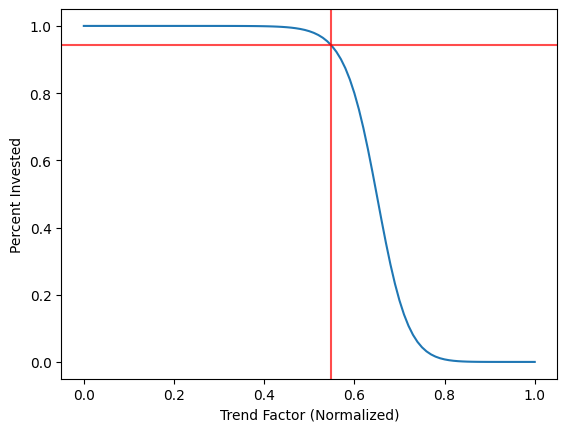

In [26]:
xs = np.linspace(0, 1, 101)
if params_out['transform_f'] == 'bounded_curve':
    ys = bounded_curve(xs, params_out['t'], params_out['k'], 'down')
else:
    ys = bounded_sigmoid(xs, params_out['t'], params_out['k'], 'down')
plt.xlabel('Trend Factor (Normalized)')
plt.ylabel('Percent Invested')
plt.plot(xs, ys)
plt.axhline(amt_in, color='r', alpha=0.7)
plt.axvline(trend_fac, color='r', alpha=0.7);

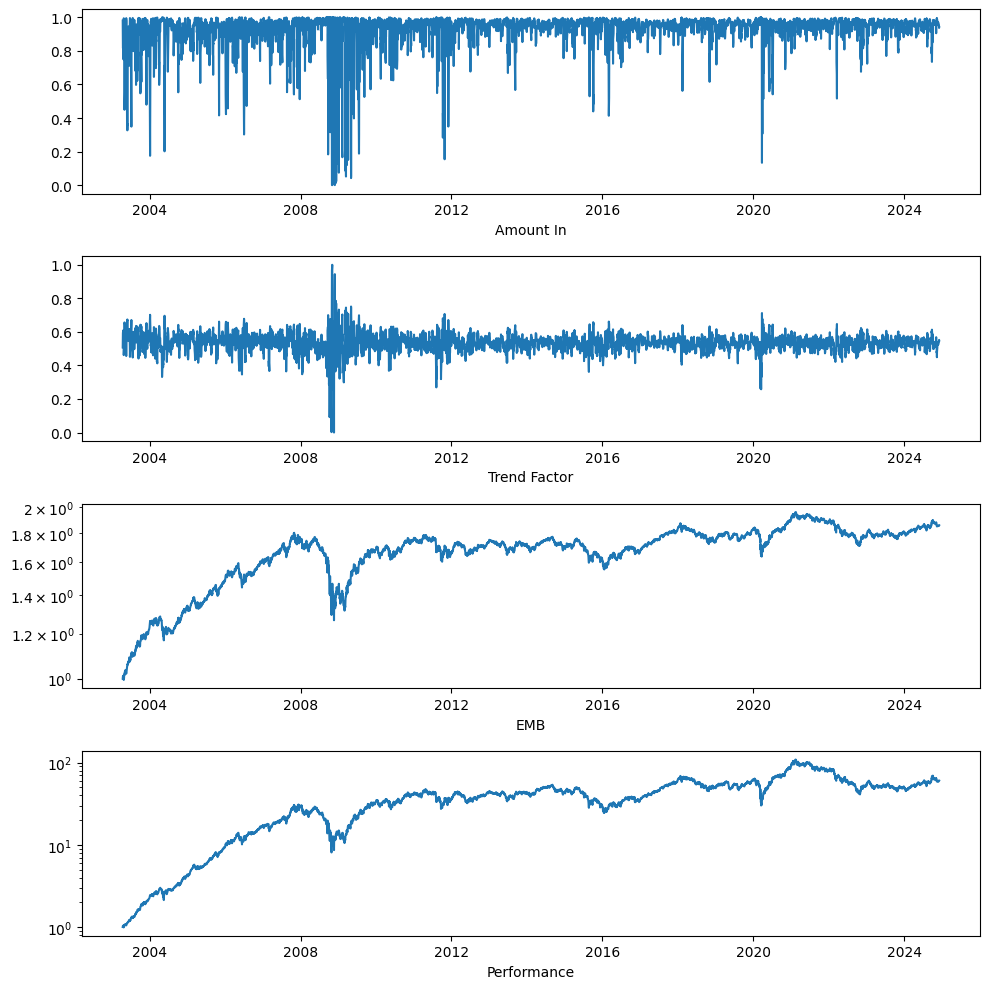

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(final_out.amt_in)
plt.xlabel('Amount In')

plt.subplot(4, 1, 2)
plt.plot(final_out.trend_factor)
plt.xlabel('Trend Factor')

plt.subplot(4, 1, 3)
plt.plot(final_out.logval / final_out.logval[0])
plt.xlabel('EMB')
plt.yscale('log')

plt.subplot(4, 1, 4)
plt.plot(final_out.total)
plt.xlabel('Performance')
plt.yscale('log')
plt.tight_layout();

In [28]:
N = 500
#plt.figure(figsize=(10, 10))
#plt.subplot(4, 1, 1)
#plt.plot(final_out.amt_in[:N])
#plt.xlabel('Amount In')

#plt.subplot(4, 1, 2)
#plt.plot(final_out.trend_factor[:N])
#plt.xlabel('Trend Factor')

#plt.subplot(4, 1, 3)
#plt.plot((final_out.logval / final_out.logval[0])[:N])
#plt.xlabel(SYM)
#plt.yscale('log')

#plt.subplot(4, 1, 4)
#plt.plot(final_out.total[:N])
#plt.xlabel('Performance')
#plt.yscale('log')
#plt.tight_layout();

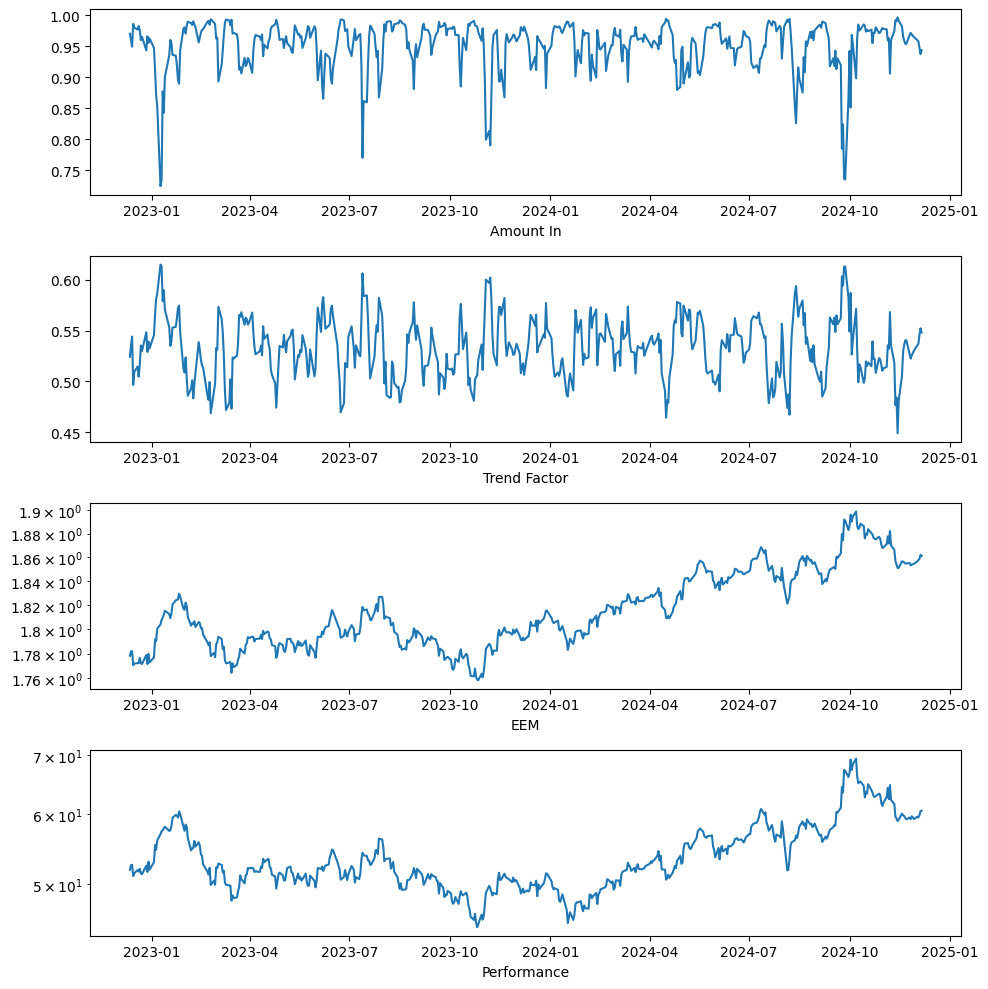

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(final_out.amt_in[-N:])
plt.xlabel('Amount In')

plt.subplot(4, 1, 2)
plt.plot(final_out.trend_factor[-N:])
plt.xlabel('Trend Factor')

plt.subplot(4, 1, 3)
plt.plot((final_out.logval / final_out.logval[0])[-N:])
plt.xlabel(SYM)
plt.yscale('log')

plt.subplot(4, 1, 4)
plt.plot(final_out.total[-N:])
plt.xlabel('Performance')
plt.yscale('log')
plt.tight_layout();

In [30]:
frac_in = round(final_out['amt_in'][-1], 4)
frac_in

0.9434

In [31]:
# n days
n = (df.index >= SIM_START).sum()
# n years
t = n / 250
# amt at start
p = df.loc[SIM_START, 'value']
amt = df.iloc[-1].value
p, t, amt

(11.29111099243164, 21.8, 44.029998779296875)

In [32]:
# annualized rate of return
r = best_out**(1/t) 
r - 1

0.20711765522916536

In [33]:
with open('daily_params.json', 'r') as f_in:
    j = json.load(f_in)
    with open('daily_params.json', 'w') as f_out:
        j['eem'] = [r, frac_in]
        print(j)
        json.dump(j, f_out)

{'sp': [1.122072663198377, 1.0], 'dia': [1.2230292709548027, 1.0], 'nas': [1.2436933815996905, 1.0], 'rus': [1.2993842889448488, 1.0], 'jpxn': [1.0756403366672331, 0.0066], 'ktec': [1.653443665503804, 0.0], 'eem': [1.2071176552291654, 0.9434], 'nfty': [1.2741849360049868, 1.0], 'gdx': [1.352652688613471, 0.9993]}


In [34]:
stop

NameError: name 'stop' is not defined

In [35]:
with open(PARAM_PATH, 'wb') as f:
    pickle.dump([best_out, params_out], f)
    
best_out, params_out

(60.553788853509076,
 {'time_param': 6,
  'method': 'linear',
  't': 0.6492746871671347,
  'k': 5.796955293378633,
  'as_q': False,
  'transform_f': 'bounded_sigmoid'})